# Map Playground

This notebook is set up to demonstrate some of the cool things `pandas` and `numpy` can do.
Additionally, the notebook can render `HTML`, so if you want to get _extra_ fancy with the presentation, keep that in mind.

To run a cell, first double click it, so that the bar on the left turns green. Then, press `Shift` & `Enter` and the cell will run. Keep in mind that variable used in the cells are considered global, so if you have _x_ in one cell, and declare _x_ again in another further down, you'll overwrite the original.

If you want more details, please see the pdfs I uploaded, or for graphing, visit these links:
 - https://pandas.pydata.org/pandas-docs/stable/visualization.html
 - http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
 - https://matplotlib.org/users/pyplot_tutorial.html

Finally, I've added cells at the bottom that will generate the TSP dataframes, so we can try playing with them a little bit, without worrying too much about keeping code clean or breaking anything important. These notebooks are great for testing and visualising what's going on.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Circle

# Set up the style of the graphs, and display a sample graph
graph_style = 5
plt.style.use(plt.style.available[graph_style])  # 5, 14, 22
sns.set_context("paper")

## Points in Circles

Write a function called `pts_in_circle( pts, center, radius)` that accepts:

`pts`:    a 2D floating point array with shape (N,2) representing N points

`center`: a tuple containing (x,y) coordinates, which are the center of the circle, and

`radius`: the radius of the circle. 

Some commands are:

`(pts[0,0], pts[0,1])`: the first point

`(pts[9,0], pts[9,1])`: the ninth point

`pts[:,0]`: all the x-coordinates

`pts[:,1]`: all the y-coordinaes.

This function returns a 2D array of all the points inside a *circle* given by `center` and `radius`, using only `numpy` operations and no loops.

In [2]:
def pts_in_circle(pts, center, radius):
    x,y = pts[:, 0], pts[:, 1]
    b = (((x-center[0])**2 + (y-center[1])**2)**0.5) <= radius
    pts = pts[b]
    return pts

`pts_in_circle` in action:

In [3]:
np.random.seed( 47 ) # ensures the same random sequence is created
pts = np.random.uniform(0.0, 1.0,(500,2)) # (x,y) = (pts[0,0], pts[0,1])
cir1 = (0.5,0.5);     cir1_r = 0.09
cir2 = (0.25, 0.75);  cir2_r = 0.05
cir3 = (0.2,0.1);     cir3_r = 0.07

print('Circle 1', end=' ')
cir1_pts = pts_in_circle( pts, cir1, cir1_r)
for x,y in cir1_pts: print('({:4.2f},{:4.2f})'.format(x,y), end=' ' )

print('\nCircle 2', end=' '); 
cir2_pts = pts_in_circle( pts, cir2, cir2_r)
for x,y in cir2_pts: print('({:4.2f},{:4.2f})'.format(x,y), end=' ' )

print('\nCircle 3', end=' ')
cir3_pts = pts_in_circle( pts, cir3, cir3_r)
for x,y in cir3_pts: print('({:4.2f},{:4.2f})'.format(x,y), end=' ' )

Circle 1 (0.44,0.53) (0.55,0.49) (0.57,0.49) (0.46,0.48) (0.53,0.47) (0.55,0.52) (0.57,0.47) (0.57,0.55) 
Circle 2 (0.25,0.75) (0.25,0.72) (0.23,0.75) (0.24,0.77) (0.28,0.77) 
Circle 3 (0.17,0.04) (0.19,0.09) (0.23,0.16) (0.23,0.11) 

And now graphed:

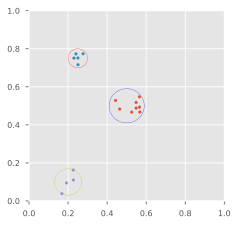

In [4]:
from matplotlib.patches import Circle
c1_ptch = Circle(cir1, cir1_r, fill=False, ec='b')
c2_ptch = Circle(cir2, cir2_r, fill=False, ec='r')
c3_ptch = Circle(cir3, cir3_r, fill=False, ec='y')

fig = plt.figure(1, figsize=(3.5,3.5) ); ax = plt.subplot() # make the plot square
ax.add_patch(c1_ptch); ax.add_patch(c2_ptch); ax.add_patch(c3_ptch);

ax.scatter(cir1_pts[:,0], cir1_pts[:,1], marker='.')
ax.scatter(cir2_pts[:,0], cir2_pts[:,1], marker='.')
ax.scatter(cir3_pts[:,0], cir3_pts[:,1], marker='.')
plt.xlim(0.0,1.0); plt.ylim(0.0,1.0)  # ensures the plot is square
None

[[1, 2], [5], [3, 4]]

A function called `count_pts_in_circle`, that returns a count of points in the circles as an integer.
`pts_in_circle` princples are heavily re-used here.

In [5]:
def count_pts_in_circle(pts, center, radius ):  # slightly smaller
    x,y = pts[:, 0], pts[:, 1]
    b = (((x-center[0])**2 + (y-center[1])**2)**0.5) <= radius
    return np.sum(b)

Testing`count_pts_in_circle` with:

In [6]:
print('cir1 = %d' % count_pts_in_circle( pts, cir1, .10) )
print('cir2 = %d' % count_pts_in_circle( pts, cir2, .05) )
print('cir3 = %d' % count_pts_in_circle( pts, cir3, .07) )

cir1 = 9
cir2 = 5
cir3 = 4


## Circles in Circles

A function called `circles_inside_circle( pts, circle)` that accepts:

`pts`:    a 2D floating point array with shape (N,3) representing N circles in the form `(x,y,r)`, where `(x,y)` is the center of a circle with radius `r`

`circle`: A 3-tuple `(x,y,r)`, containing the (x,y) coordinates of the center of the
circle, and radius `r`. This circle is the one that contains the others.

In [7]:
def circles_inside_circle( pts, circle):
    x, y, r = pts[:, 0], pts[:, 1], pts[:, 2]
    b = (((x-circle[0])**2 + (y-circle[1])**2)**0.5) <= circle[2]-r
    pts = pts[b]
    return pts

Testing with:

In [8]:
np.random.seed( 47 ) # ensures the same random sequence is created
pts = np.random.uniform(0.0, 10.0,(500,3)) # (x,y,r) = (pts[0,0], pts[0,1], pts[0,2])
# scale the radius
pts[:,2] /= 6.0

def display(msg, circles ):
    print(msg, 'contains ', end='')
    for x,y,r in circles:
        print('({:.1f},{:.1f},{:.2f})'.format(x,y,r), end=' ' )
    print()
    
tests = [ (5.0,5.0, 1.0), (1.0,2.0, 1.0), (7.5, 9.0, 1.0),  ]
for cir in tests:
    c = circles_inside_circle(pts,cir)
    display( str(cir), c)

(5.0, 5.0, 1.0) contains (5.3,5.5,0.43) (5.7,4.7,0.10) (4.7,5.7,0.20) 
(1.0, 2.0, 1.0) contains (0.2,1.7,0.06) (0.4,1.8,0.39) (0.7,2.5,0.42) (1.2,2.7,0.05) (1.3,1.7,0.36) 
(7.5, 9.0, 1.0) contains (7.1,8.8,0.32) (7.5,9.0,0.32) 


Plot all the circles contained in `(3.5, 4.5, 1.75)` in a similar way like above. `scatter` plots the circle 
centers, and `Circle` plots the outlines. 

The containing circle is plotted in a differenct colour, using the keyword argment `ec`.

In [9]:
cc = (3.5, 4.5, 1.75)
cirs = circles_inside_circle(pts, cc )

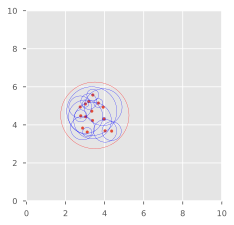

In [10]:
main = Circle( (cc[0], cc[1]), cc[2], fill=False, ec='r')
ig = plt.figure(1, figsize=(3.5,3.5) ); ax = plt.subplot() # make the plot square
ax.add_patch(main);

ax.scatter( cirs[:,0], cirs[:,1], marker='.' )
for i in cirs:
    circ = Circle( (i[0], i[1]), i[2], fill=False, ec='b')
    ax.add_patch(circ);

plt.xlim(0.0,10.0); plt.ylim(0.0,10.0)  # ensures the plot is square
pass

## TSP Set-up

In [11]:
cols = ['Latitude (Range shifted)', 'Longitude (Range shifted)']
def read_tsp_file(fnum):
    global FILENUM
    FILENUM = fnum
    if fnum == 1:
        fname = "TSP_WesternSahara_29.txt"
    elif fnum == 2:
        #print('Warning! Takes approximately 1.5 seconds per decade')
        fname = "TSP_Uruguay_734.txt"
    elif fnum == 3:
        #print('Warning! Takes approximately 45 seconds per decade')
        fname = "TSP_Canada_4663.txt"
    else:
        print('Warning! Invalid seletion. Defaulting to test')
        fname = "TSP_Testbed_10.txt"

    # Uses indexing from 0, rather than 1, by skipping the first column in the data.
    CITIES = pd.read_csv('Setups/TSP/TSP_Inputs/' + fname, usecols=[1, 2], header=None, delimiter=' ')
    CITIES.columns = ['Lat', 'Lon']
    CITIES.index.names = ['City']

    Lats = CITIES['Lat'].transpose()
    Lons = CITIES['Lon'].transpose()
    DISTANCES = pd.DataFrame([((Lats - Lats[i])**2 + (Lons - Lons[i])**2)**0.5 for i in range(Lons.size)])

    # Translate and invert the x values, and translate the y values
    CITIES['Lat'] = CITIES['Lat'] - (CITIES['Lat'].min() + (CITIES['Lat'].max() - CITIES['Lat'].min()) / 2)
    CITIES['Lon'] = (CITIES['Lon'].min() + (CITIES['Lon'].max() - CITIES['Lon'].min()) / 2) - CITIES['Lon']
    CITIES.columns = cols

    return CITIES, DISTANCES

In [12]:
def brute_force_solver(fnum=None, pandas=True):
    def depth_first_eval(start_list, to_add, opt_dist, opt_path):
        if not to_add:
            fitness = euclidean_distance(start_list)
            if fitness <= opt_dist:
                if fitness == opt_dist: print('Equal fitness found.')
                else: print('New best fitness found: {}'.format(fitness))
                opt_path = start_list.copy()
                print(opt_path)
            return fitness, opt_path

        ele = to_add.pop(0)
        for i in range(1, len(start_list)+1):
            start_list.insert(i, ele)
            if euclidean_distance(temp) <= opt_dist:
                best, opt_path = depth_first_eval(start_list, to_add, opt_dist, opt_path)
                if best < opt_dist:
                    opt_dist = best
            del start_list[i]
        to_add.insert(0, ele)
        return opt_dist, opt_path

    if fnum: read_tsp_file(fnum)
    opt_dist, opt_path, _ = get_best_path(FILENUM, brute_search=True)

    start_time = time.time()
    nodes = np.array([i for i in range(len(CITIES))])
    opt_dist, opt_path = depth_first_eval(nodes[:3], nodes[3:], opt_dist, opt_path)
    print("Heuristic aided brute force search took a total of: %s seconds" % (time.time() - start_time))
    print('Optimal fitness: ', opt_dist)
    print(opt_path)

In [13]:
def cities_in_radius(dataframe, city, radius):
    x, y = dataframe[cols[1]], dataframe[cols[0]]
    bool_frame = (((x-dataframe.loc[city][1])**2 + (y-dataframe.loc[city][0])**2)**0.5) <= radius
    image = dataframe[bool_frame]
    image.index.names = ['City - {}'.format(city)]
    return image

In [14]:
def scatter_heatmap(dataframe, target_cities=None, target_range=None):
    import warnings; warnings.filterwarnings("ignore")
    
    dataframe.plot.scatter(x=cols[1], y=cols[0], c=dataframe.index.get_values(), colormap='winter')

    if target_cities and target_range:
        if type(target_cities) == int: target_cities = [target_cities]
        fig = plt.figure(1, figsize=(12,12))
        ax = plt.subplot()
        for city in target_cities:
            circle_center = (dataframe.loc[city][1], dataframe.loc[city][0])
            patch = Circle(circle_center, target_range, fill=False, ec='r', linewidth=1.5)
            ax.add_patch(patch)
            print(cities_in_radius(dataframe, city, target_range))

In [19]:
SAHARA_D

City,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.000000,74.535614,4109.913460,3047.995707,2266.911731,973.538817,4190.100799,3301.893396,4757.742198,3044.348181,...,8009.386877,7398.462747,7266.049136,7424.952716,9639.271595,9229.436603,8320.273120,9300.612356,8102.468760,7798.697942
1,74.535614,0.000000,4069.705149,2999.490730,2213.594362,900.617093,4137.397249,3238.526768,4701.359129,2969.895277,...,7937.761390,7324.427101,7191.688069,7350.714030,9570.382626,9159.224253,8247.710137,9230.459913,8028.836908,7724.474366
2,4109.913460,4069.705149,0.000000,1172.366994,1972.941966,3496.228093,891.004385,1814.907358,1415.489675,3672.797925,...,5594.540974,5726.219769,5809.839745,5856.586662,6674.682742,6464.690402,6060.161328,6521.928879,6164.256256,6162.548481
3,3047.995707,2999.490730,1172.366994,0.000000,816.666700,2350.000000,1172.130077,994.708188,1796.678989,2648.374811,...,5695.222154,5536.100412,5544.929032,5633.717608,7044.245137,6739.765876,6110.282754,6804.328734,6090.178765,5975.730557
4,2266.911731,2213.594362,1972.941966,816.666700,0.000000,1533.333300,1923.899450,1188.018884,2497.220663,2208.380533,...,6093.553067,5754.028428,5710.719872,5826.829406,7572.244710,7220.437809,6470.552960,7288.213536,6373.033449,6186.059920
5,973.538817,900.617093,3496.228093,2350.000000,1533.333300,0.000000,3416.829292,2409.760233,3935.380782,2113.777578,...,7039.274740,6428.978853,6302.326670,6458.374995,8685.172597,8266.616241,7347.202789,8338.148656,7130.061528,6831.794153
6,4190.100799,4137.397249,891.004385,1172.130077,1923.899450,3416.829292,0.000000,1233.333365,650.854097,3086.349966,...,4775.458093,4843.461673,4920.893411,4970.770706,5976.923270,5718.634242,5227.332015,5779.513687,5300.969508,5281.052299
7,3301.893396,3238.526768,1814.907358,994.708188,1188.018884,2409.760233,1233.333365,0.000000,1586.488052,1876.758499,...,4906.062028,4614.749978,4598.577413,4700.012449,6399.848159,6036.969438,5287.353901,6105.234621,5208.886637,5051.390943
8,4757.742198,4701.359129,1415.489675,1796.678989,2497.220663,3935.380782,650.854097,1586.488052,0.000000,3285.363182,...,4179.746154,4355.700880,4467.822943,4496.690782,5330.468072,5083.333348,4644.740169,5143.091464,4760.543855,4787.104049
9,3044.348181,2969.895277,3672.797925,2648.374811,2208.380533,2113.777578,3086.349966,1876.758499,3285.363182,0.000000,...,5216.693304,4421.195850,4255.950856,4427.563719,7000.257989,6513.106435,5454.712545,6587.066508,5156.037427,4801.339912


In [15]:
SAHARA_C, SAHARA_D = read_tsp_file(1)
SAHARA_C
SAHARA_D[0][10]

3094.978054490498

In [44]:
x = SAHARA_C.max()
y = SAHARA_C.min()

dist_mod = 0.10

dists = ((x[0] - y[0])*dist_mod, (x[1] - y[1])*dist_mod)
dists

(662.9166700000002, 726.6666700000001)

In [50]:
set(cities_in_radius(SAHARA_C, 21, dists[1]).index)

{17, 18, 20, 21, 22, 28}

In [98]:
from random import sample

dist_mod = 0.10

def get_map_range(CITIES):
    x = CITIES.max()
    y = CITIES.min()
    return (x[0] - y[0]), (x[1] - y[1])

def find_clusters(CITIES):
    height, width = get_map_range(CITIES)
    if height > width: dist = height
    else: dist = width

    cities_left = set(CITIES.index)

    city_clusters = []

    while len(cities_left) != 0:
        city = sample(cities_left, 1)[0]
        cluster = cities_left & set(cities_in_radius(CITIES, city, dist*dist_mod).index)
        cities_left = cities_left - cluster
        city_clusters.append(list(cluster))

    return city_clusters

city_clusters = find_clusters(SAHARA_C)
city_clusters

[[4],
 [8, 6],
 [24, 26, 23],
 [19, 25, 27],
 [3],
 [16, 17, 18, 20, 21],
 [7],
 [28, 22],
 [0, 1],
 [15],
 [5],
 [14],
 [9, 10],
 [11],
 [2],
 [13],
 [12]]

In [99]:
from random import shuffle

population = []
pop_size = 20

for _ in range(pop_size):
    shuffle(city_clusters)
    indiv = []
    for x in city_clusters:
        shuffle(x)
        indiv += x
    population.append(indiv)
        
for x in population:
    print(x)

[15, 8, 6, 17, 16, 21, 18, 20, 12, 2, 23, 24, 26, 13, 22, 28, 4, 19, 27, 25, 9, 10, 1, 0, 7, 11, 3, 14, 5]
[22, 28, 27, 25, 19, 11, 15, 16, 20, 18, 21, 17, 8, 6, 5, 12, 23, 26, 24, 4, 0, 1, 10, 9, 14, 7, 3, 13, 2]
[7, 26, 24, 23, 28, 22, 0, 1, 5, 11, 14, 4, 19, 25, 27, 3, 8, 6, 12, 10, 9, 15, 13, 2, 16, 18, 20, 21, 17]
[13, 24, 26, 23, 25, 19, 27, 11, 14, 15, 12, 3, 8, 6, 1, 0, 20, 16, 17, 18, 21, 7, 22, 28, 2, 5, 9, 10, 4]
[11, 14, 15, 12, 27, 25, 19, 24, 26, 23, 9, 10, 2, 13, 7, 17, 18, 16, 20, 21, 8, 6, 5, 1, 0, 3, 28, 22, 4]
[26, 23, 24, 2, 22, 28, 20, 18, 17, 21, 16, 25, 27, 19, 13, 1, 0, 5, 8, 6, 15, 14, 4, 7, 11, 3, 10, 9, 12]
[25, 19, 27, 2, 6, 8, 15, 3, 14, 4, 17, 21, 16, 18, 20, 11, 13, 22, 28, 9, 10, 12, 26, 23, 24, 5, 7, 0, 1]
[28, 22, 23, 26, 24, 1, 0, 13, 7, 12, 11, 4, 6, 8, 5, 2, 9, 10, 3, 25, 27, 19, 15, 14, 18, 20, 17, 21, 16]
[11, 17, 16, 20, 18, 21, 12, 25, 27, 19, 5, 0, 1, 15, 10, 9, 3, 23, 24, 26, 13, 4, 28, 22, 7, 6, 8, 14, 2]
[11, 14, 10, 9, 3, 19, 27, 25, 4, 2, 

           Latitude (Range shifted)  Longitude (Range shifted)
City - 23                                                     
23                       3018.75005                 3633.33335
          Latitude (Range shifted)  Longitude (Range shifted)
City - 1                                                     
0                      -3314.58335                -3633.33335
1                      -3247.91665                -3600.00005
           Latitude (Range shifted)  Longitude (Range shifted)
City - 25                                                     
25                       3085.41665                 1683.33335
           Latitude (Range shifted)  Longitude (Range shifted)
City - 11                                                     
11                       -264.58335                -1066.66665
           Latitude (Range shifted)  Longitude (Range shifted)
City - 23                                                     
23                       3018.75005                 3633.33

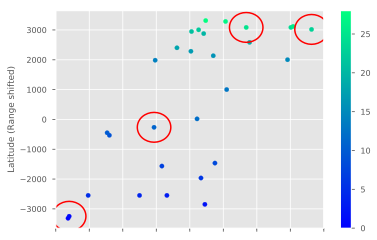

In [85]:
scatter_heatmap(SAHARA_C, [23, 1, 25, 11], 500)
print(cities_in_radius(SAHARA_C, 23, 500))

In [22]:
URUGUAY_C, URUGUAY_D = read_tsp_file(2)
print(URUGUAY_C[cols[0]].max())
print(URUGUAY_C[cols[1]].max())
print(URUGUAY_C[cols[0]].min())
print(URUGUAY_C[cols[1]].min())
URUGUAY_C.head()

2416.6667000000016
2558.333350000001
-2416.6667000000016
-2558.333350000001


,Latitude (Range shifted),Longitude (Range shifted)
City,,
0,-2416.6667,-1774.99995
1,-2383.3333,-1241.66665
2,-2316.6667,-1724.99995
3,-2300.0000,-991.66665
4,-2300.0000,-1091.66665


           Latitude (Range shifted)  Longitude (Range shifted)
City - 25                                                     
6                        -2250.0000                -1108.33335
7                        -2233.3333                 -958.33335
8                        -2150.0000                 -608.33335
9                        -2150.0000                 -924.99995
11                       -2083.3333                 -691.66665
12                       -2066.6667                 -658.33335
13                       -2050.0000                 -591.66665
14                       -2050.0000                 -808.33335
16                       -1983.3333                -1024.99995
18                       -1933.3333                -1041.66665
20                       -1866.6667                -1174.99995
22                       -1833.3333                 -741.66665
23                       -1816.6667                 -874.99995
25                       -1800.0000                 -89

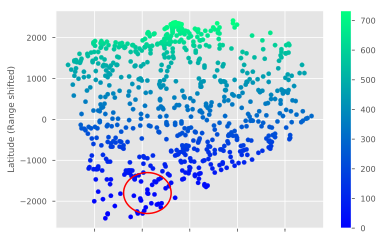

In [23]:
scatter_heatmap(URUGUAY_C, 25, 500)

In [26]:
CANADA_C, CANADA_D = read_tsp_file(3)
CANADA_C.max()

Latitude (Range shifted)     20341.66665
Longitude (Range shifted)    44158.33330
dtype: float64

In [34]:
x = CANADA_C.max()
y = CANADA_C.min()

dist_mod = 0.05

dists = ((x[0] - y[0])*dist_mod, (x[1] - y[1])*dist_mod)
dists

(2034.166665, 4415.83333)

            Latitude (Range shifted)  Longitude (Range shifted)
City - 125                                                     
25                      -19708.33335                 14941.6667
27                      -19574.99995                 15141.6667
30                      -19541.66665                 15225.0000
31                      -19508.33335                 16375.0000
32                      -19491.66665                 16008.3333
33                      -19474.99995                 15608.3333
34                      -19441.66665                 15741.6667
35                      -19424.99995                 15525.0000
37                      -19391.66665                 15125.0000
38                      -19358.33335                 16625.0000
39                      -19358.33335                 15841.6667
40                      -19358.33335                 15641.6667
41                      -19341.66665                 16758.3333
42                      -19324.99995    

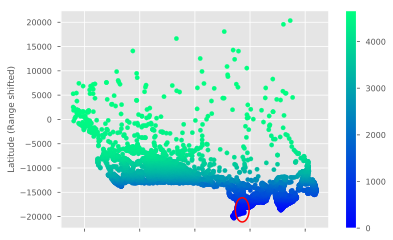

In [32]:
scatter_heatmap(CANADA_C, 125, 2500)